# Comparing output results from cellassign 



In this notebook, we observe the annotation results obtained from cellassign https://github.com/Irrationone/cellassign
Those results were obtained in R in the R markdown named:
cellassign.Rmd/cellassign.html


In this exercice we first predict labels for the PBMC3k datasets using:

- the default signatures provided with cellassign (cellassign_dblabel)
- a small set of besca's signatures (bescaVvs)
- a larger set of besca's signatures, 2 versions (bescaMarkerF, bescaFv2)

PMBC3k predition by cellassign is compared with the sig-annot and auto-annot prediction.



In [73]:
import besca as bc
import scanpy as sc
import pandas as pd
import logging

In [74]:
sc.logging.print_versions()

-----
anndata     0.7.5
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
annoy               NA
attr                20.3.0
backcall            0.2.0
bbknn               NA
besca               2.3+34.gf0f50cb
biothings_client    0.2.1
certifi             2020.12.05
cffi                1.14.4
chardet             3.0.4
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
dominate            2.6.0
fbpca               NA
get_version         2.1
greenlet            0.4.17
h5py                2.10.0
idna                2.7
igraph              0.8.3
importlib_metadata  1.1.0
iniconfig           NA
intervaltree        NA
ipykernel           5.4.2
ipython_genutils    0.2.0
ipywidgets          7.6.2
jedi                0.18.0
jinja2              2.11.2
joblib              0.14.0
jsonschema          3.2.0
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.3

# PBMC prediction


We load the dataset predicted with Auto-Annot

In [75]:
pbmc3K_prediction = sc.read_h5ad("adata_predicted_16072020.h5ad")

In  this pbm3k data are stored multiples scores and information.
Leiden is the leiden clustering on the whole datasets post classical filtering.
dblabel is the results of the sig-annot procedure on the whole dataset also after reclustering around T-cells/NK-cells for a finer grain annotation. Finally auto_annot is the results of the auto-annot procedure using Granja and Kotliarov datasets as training sets.

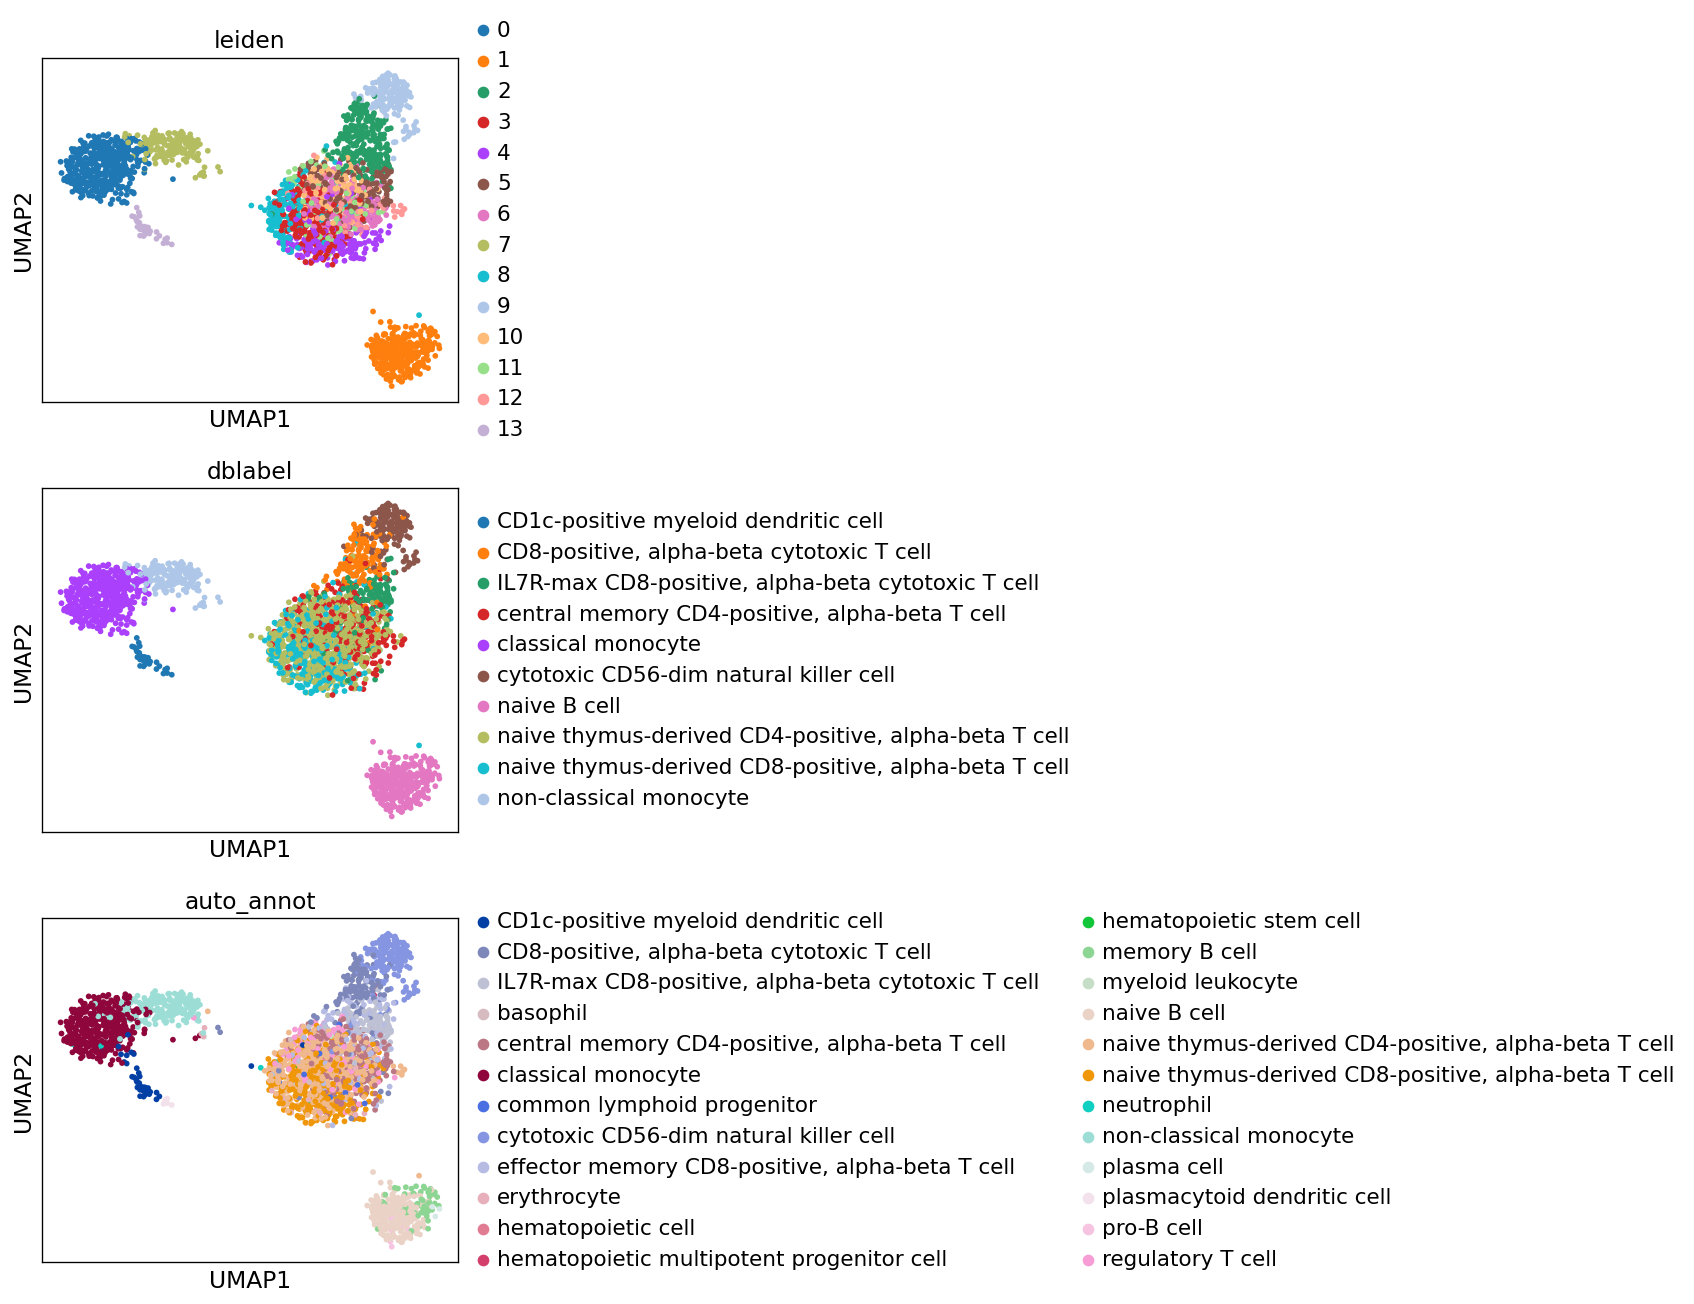

In [76]:
sc.pl.umap(pbmc3K_prediction, color = ["leiden", "dblabel", "auto_annot"], ncols = 1)

In [77]:
#bc.tl.auto_annot.report(pbmc3K_prediction, celltype = 'dblabel', method = 'autoannot', analysis_name= 'autoannot',
#                       train_datasets='pmbc3k',  test_dataset='GranjaAndKV', merge = True, use_raw=False)

# Cellassign prediction

We load the prediction obtained with cellassign and upload the said results in our h5ad object.

cellassign predictions were obtained in R, please see cellassign.html / cellassign.Rmd

In [78]:
read_bescaF_prediction= pd.read_csv("pbmc3k_filtered_cellassign_bescaMarkersF.csv", header= None)
read_bescaF_prediction.index=list(read_bescaF_prediction[0])
read_bescaF_prediction=read_bescaF_prediction.drop(columns=0)
read_bescaF_prediction.rename(columns={1: 'bescaF_label'},
                 inplace=True)

read_bescaFv2_prediction= pd.read_csv("pbmc3k_filtered_cellassign_bescaFv2.csv", header= None)
read_bescaFv2_prediction.index=list(read_bescaFv2_prediction[0])
read_bescaFv2_prediction=read_bescaFv2_prediction.drop(columns=0)
read_bescaFv2_prediction.rename(columns={1: 'bescaF_label'},
                 inplace=True)

read_bescaVvs_prediction= pd.read_csv("pbmc3k_filtered_cellassign_bescaVvshort.csv", header= None)
read_bescaVvs_prediction.index=list(read_bescaVvs_prediction[0])
read_bescaVvs_prediction=read_bescaVvs_prediction.drop(columns=0)
read_bescaVvs_prediction.rename(columns={1: 'bescaF_label'},
                 inplace=True)


read_cellassign_prediction= pd.read_csv("pbmc3k_filtered_cellassign.csv", header= None)
read_cellassign_prediction.index=list(read_cellassign_prediction[0])
read_cellassign_prediction=read_cellassign_prediction.drop(columns=0)
read_cellassign_prediction.rename(columns={1: 'cellassign_label'},
                 inplace=True)

In [79]:
bescaF_probabilities=pd.read_csv("pbmc3k_filtered_cellassign_bescaMarkersF_probabilities.csv")
bescaFv2_probabilities=pd.read_csv("pbmc3k_filtered_cellassign_bescaMarkersF_probabilities.csv")
bescaVvs_probabilities=pd.read_csv("pbmc3k_filtered_cellassign_bescaVvshort_probabilities.csv")

## Labels to dblabel 


We need to map back the labels to dblabels using the dblabel nomenclature (described in besca in CellTypes_v1.tsv) when using the singlecell datasets provided by cellassign (in the celldex package)

In [80]:
set(read_cellassign_prediction['cellassign_label'])

{'B cells',
 'Cytotoxic T cells',
 'Epithelial cells',
 'Monocyte/Macrophage',
 'T cells',
 'Vascular smooth muscle cells',
 'unassigned'}

In [81]:
dblabel_mapping = {'B cells': 'B cell',
                            'Cytotoxic T cells': 'CD8-positive, alpha-beta cytotoxic T cell',
                            'Epithelial cells': 'epithelial cell',
                            'Monocyte/Macrophage': 'myeloid cell',
                            'T cells': 'T cell',
                            'Vascular smooth muscle cells': 'smooth muscle cell', 
                            'unassigned': 'unassigned'}





In [82]:

read_cellassign_prediction['dblabel_cellassign'] = read_cellassign_prediction.cellassign_label.copy().map(dblabel_mapping)


In [36]:
### transform these short forms to dblabel - EFO standard nomenclature
nomenclature=pd.read_csv(bescapath+'/besca/datasets/nomenclature/CellTypes_v1.tsv',sep='\t',header=0,skiprows=range(1, 2))


In [83]:
read_bescaF_prediction["bescaF_label"].replace(to_replace='unassigned', value="Cell", inplace=True)
read_bescaF_prediction["bescaF_label"].replace(to_replace='Prolif', value="ProlifMyeloid", inplace=True)

read_bescaVvs_prediction["bescaF_label"].replace(to_replace='unassigned', value="Cell", inplace=True)
read_bescaVvs_prediction["bescaF_label"].replace(to_replace='Prolif', value="ProlifMyeloid", inplace=True)

read_bescaFv2_prediction["bescaF_label"].replace(to_replace='unassigned', value="Cell", inplace=True)
read_bescaFv2_prediction["bescaF_label"].replace(to_replace='Prolif', value="ProlifMyeloid", inplace=True)

In [84]:
read_bescaF_prediction["bescaF_label"]=[list(nomenclature.loc[nomenclature['short_dblabel']==x,'dblabel'])[0] for x in list(read_bescaF_prediction["bescaF_label"])]
read_bescaFv2_prediction["bescaF_label"]=[list(nomenclature.loc[nomenclature['short_dblabel']==x,'dblabel'])[0] for x in list(read_bescaFv2_prediction["bescaF_label"])]
read_bescaVvs_prediction["bescaF_label"]=[list(nomenclature.loc[nomenclature['short_dblabel']==x,'dblabel'])[0] for x in list(read_bescaVvs_prediction["bescaF_label"])]

In [85]:
read_bescaF_prediction["bescaF_label"].replace(to_replace='animal cell', value="unassigned", inplace=True)
read_bescaF_prediction["bescaF_label"].replace(to_replace='proliferating myeloid leukocyte', value="proliferating hematopoietic cell", inplace=True)

read_bescaFv2_prediction["bescaF_label"].replace(to_replace='animal cell', value="unassigned", inplace=True)
read_bescaFv2_prediction["bescaF_label"].replace(to_replace='proliferating myeloid leukocyte', value="proliferating hematopoietic cell", inplace=True)

read_bescaVvs_prediction["bescaF_label"].replace(to_replace='animal cell', value="unassigned", inplace=True)
read_bescaVvs_prediction["bescaF_label"].replace(to_replace='proliferating myeloid leukocyte', value="proliferating hematopoietic cell", inplace=True)

In [86]:
read_bescaVvs_prediction["bescaVvs_label"]=read_bescaVvs_prediction["bescaF_label"].copy()
read_bescaFv2_prediction["bescaFv2_label"]=read_bescaFv2_prediction["bescaF_label"].copy()

In [87]:
obs_bis = pbmc3K_prediction.obs.join(read_bescaF_prediction["bescaF_label"], how = "left")
obs_bis = obs_bis.join(read_bescaVvs_prediction["bescaVvs_label"], how = "left")
obs_bis = obs_bis.join(read_bescaFv2_prediction["bescaFv2_label"], how = "left")
obs_bis = obs_bis.join(read_cellassign_prediction["cellassign_label"], how = "left")
obs_bis = obs_bis.join(read_cellassign_prediction["dblabel_cellassign"], how = "left")



In [88]:
pbmc3K_prediction.obs  = obs_bis.copy()

In [89]:
for i in list(bescaF_probabilities.columns):
    pbmc3K_prediction.obs['P_'+i]=bescaF_probabilities[i]


In [90]:
    
for i in list(bescaVvs_probabilities.columns):
    pbmc3K_prediction.obs['PVvs_'+i]=bescaVvs_probabilities[i]

In [91]:
for i in list(bescaFv2_probabilities.columns):
    pbmc3K_prediction.obs['PFv2_'+i]=bescaFv2_probabilities[i]

In [92]:
sc.pl.umap(pbmc3K_prediction,color=['P_ClassMonocyte','P_cDC','P_pDC','P_CytotoxCD8Tcell','P_NaiTcell',
                                    'P_CD56dimNK','P_CD56brightNK','P_Mast'])

... storing 'bescaF_label' as categorical
... storing 'bescaVvs_label' as categorical
... storing 'bescaFv2_label' as categorical
... storing 'cellassign_label' as categorical
... storing 'dblabel_cellassign' as categorical


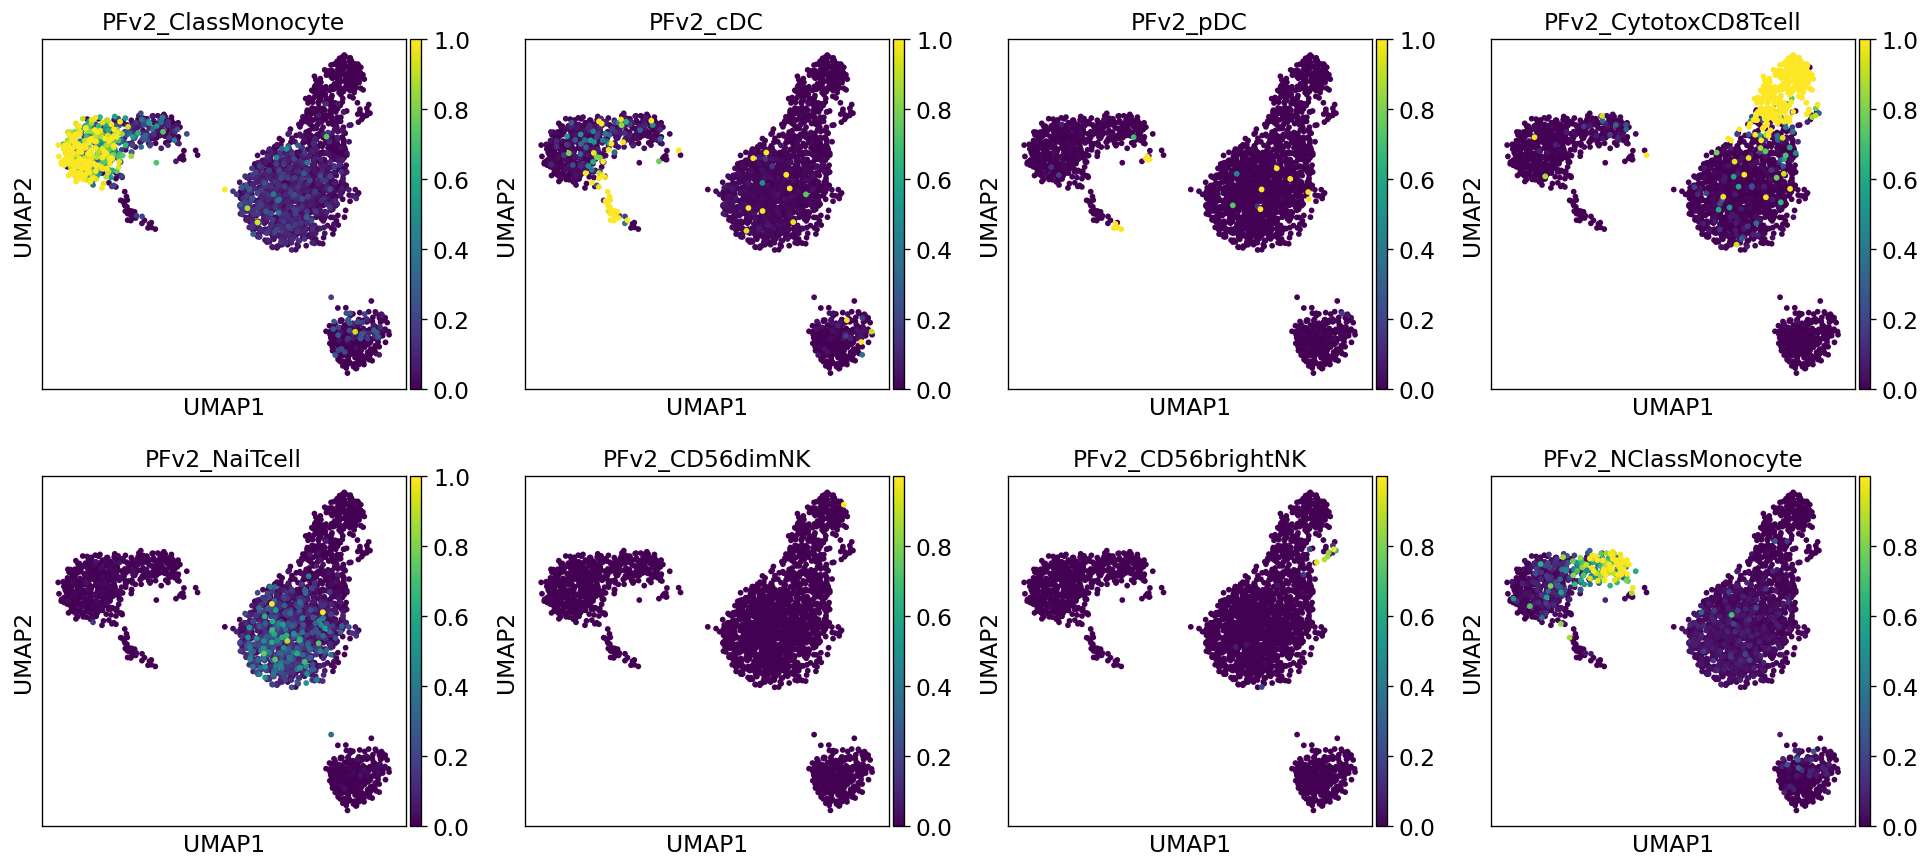

In [93]:
sc.pl.umap(pbmc3K_prediction,color=['PFv2_ClassMonocyte','PFv2_cDC','PFv2_pDC','PFv2_CytotoxCD8Tcell','PFv2_NaiTcell',
                                    'PFv2_CD56dimNK','PFv2_CD56brightNK','PFv2_NClassMonocyte'])

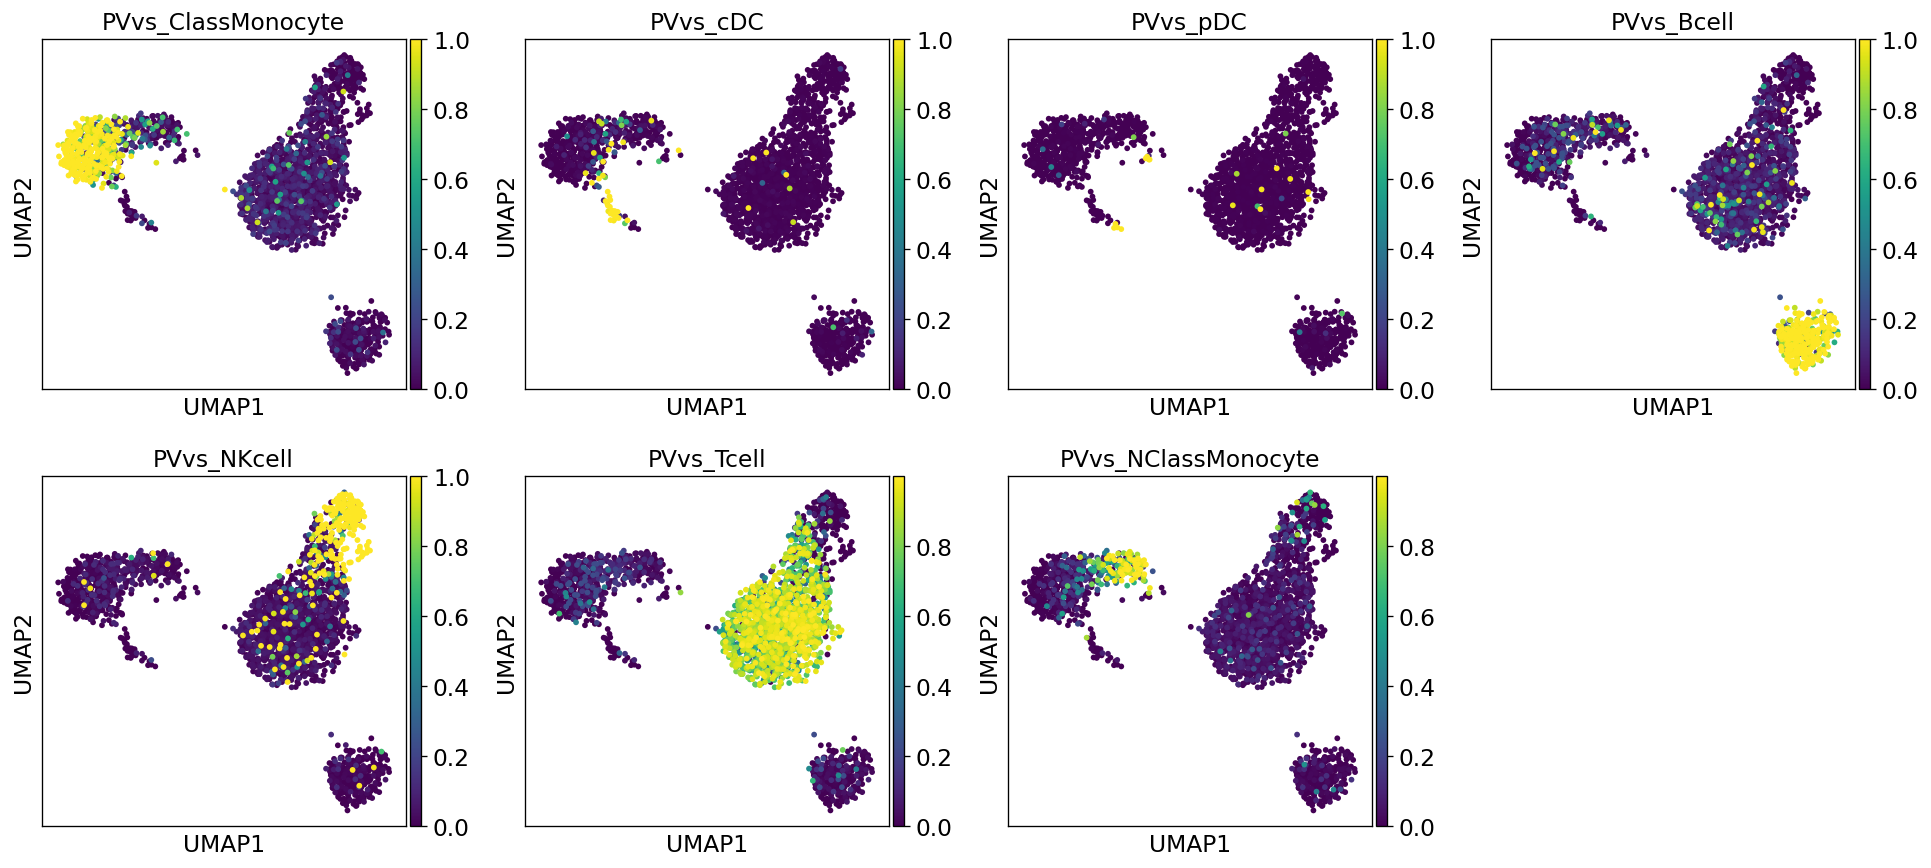

In [94]:
sc.pl.umap(pbmc3K_prediction,color=['PVvs_ClassMonocyte','PVvs_cDC','PVvs_pDC','PVvs_Bcell','PVvs_NKcell',
                                    'PVvs_Tcell','PVvs_NClassMonocyte'])

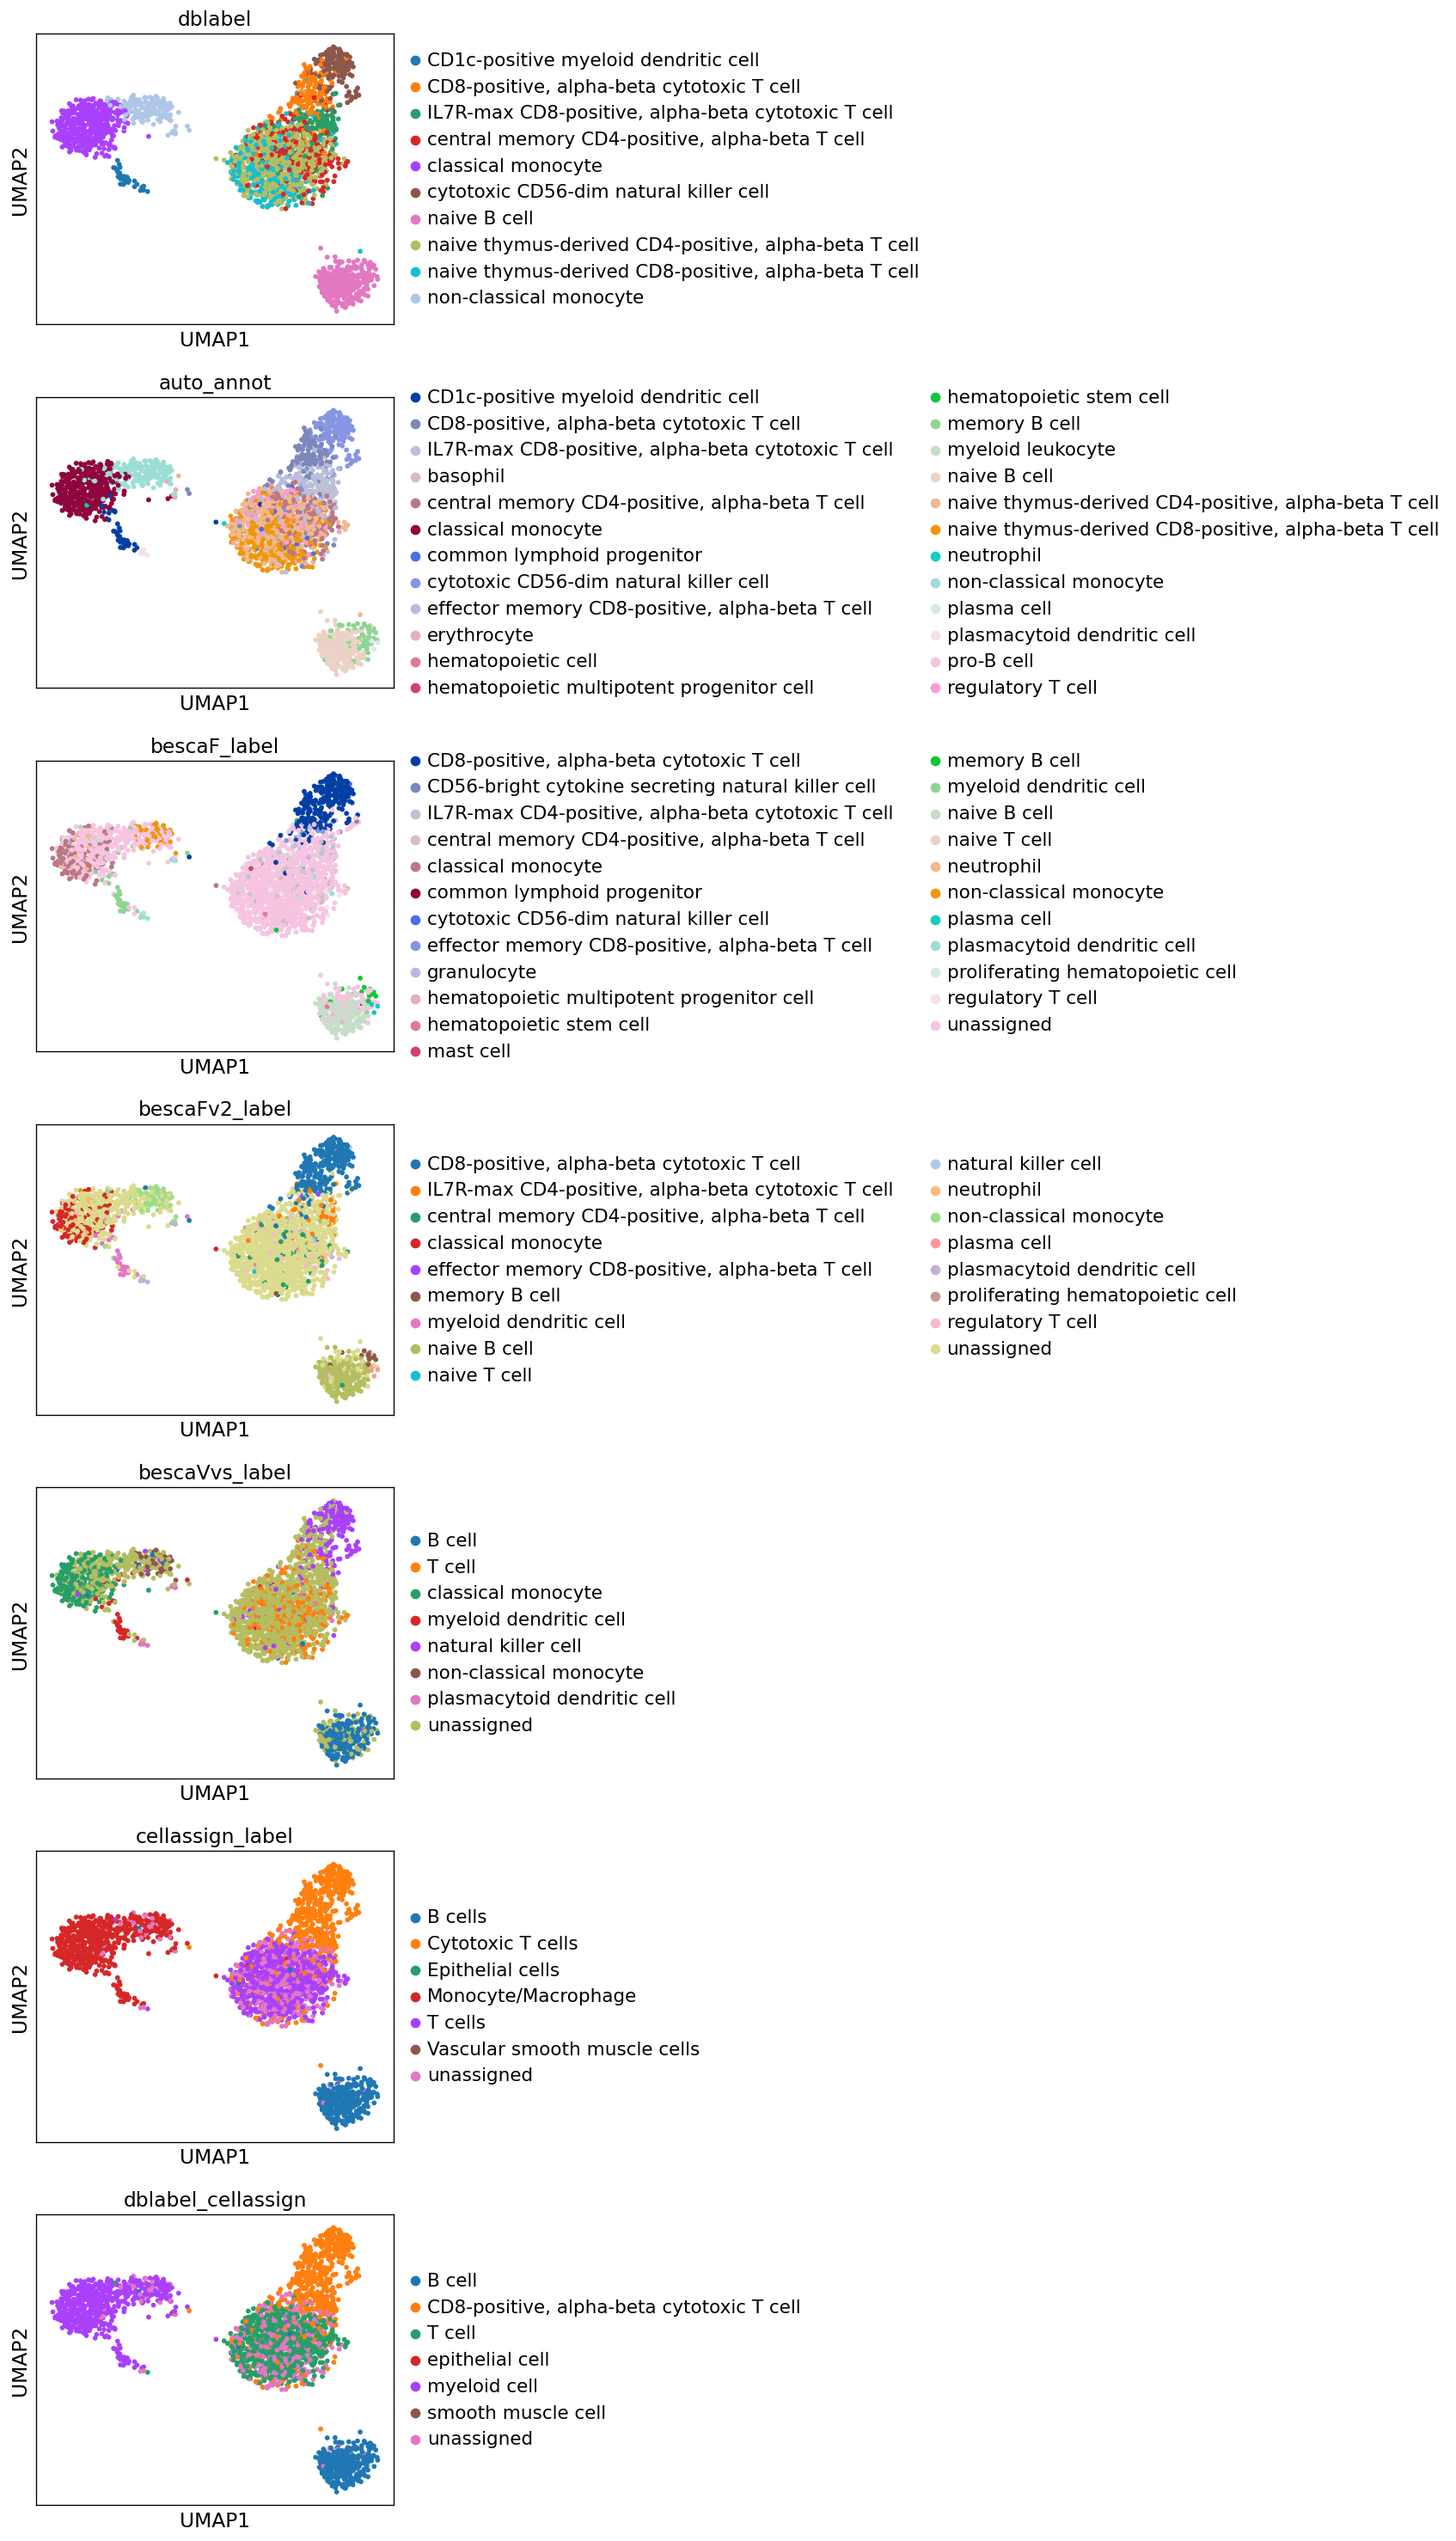

In [95]:

sc.pl.umap( pbmc3K_prediction, color = ["dblabel",'auto_annot' , 'bescaF_label','bescaFv2_label','bescaVvs_label',
                                        'cellassign_label','dblabel_cellassign'], ncols= 1)

In [96]:
#sc.pl.umap( pbmc3K_prediction, color = [ 'dblabel', "auto_annot", "KV_dblabel","Granja_dblabel","KVandGranja_dblabel" ], ncols= 2)

# Comparing predictions
We fix the palette to keep the same colors for the UMAPs celltypes

In [97]:
values_ = set( pd.Categorical(pbmc3K_prediction.obs.dblabel).categories.tolist()+\
                  pd.Categorical(pbmc3K_prediction.obs.bescaF_label).categories.tolist()+\
                  pd.Categorical(pbmc3K_prediction.obs.bescaFv2_label).categories.tolist()+\
                  pd.Categorical(pbmc3K_prediction.obs.bescaVvs_label).categories.tolist()+\
                  pd.Categorical(pbmc3K_prediction.obs.dblabel_cellassign).categories.tolist()+\
                  pd.Categorical(pbmc3K_prediction.obs.auto_annot).categories.tolist())
import seaborn as sns 
#palette_ = sns.color_palette("tab10", len( values_) ) #
palette_ = sns.color_palette(n_colors=len( values_) ) #n_colors=30
palette_colors  = dict(zip(values_, palette_))
#palette_colors

In [98]:
bc.pl.update_qualitative_palette( pbmc3K_prediction, palette_colors,  group = 'dblabel', checkColors = True)
bc.pl.update_qualitative_palette( pbmc3K_prediction, palette_colors,  group = 'auto_annot', checkColors = True)
bc.pl.update_qualitative_palette( pbmc3K_prediction, palette_colors,  group = 'bescaF_label', checkColors = True)
bc.pl.update_qualitative_palette( pbmc3K_prediction, palette_colors,  group = 'bescaFv2_label', checkColors = True)
bc.pl.update_qualitative_palette( pbmc3K_prediction, palette_colors,  group = 'bescaVvs_label', checkColors = True)
bc.pl.update_qualitative_palette( pbmc3K_prediction, palette_colors,  group = 'dblabel_cellassign', checkColors = True)


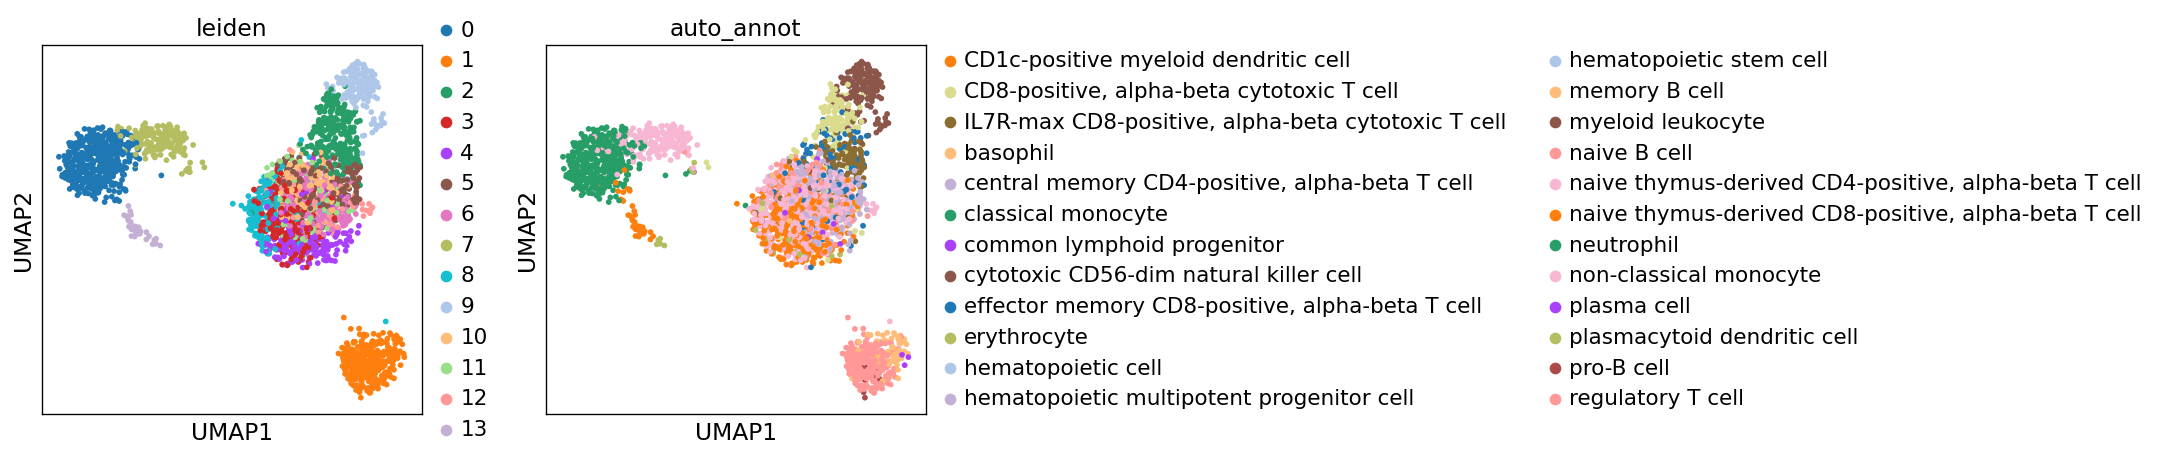

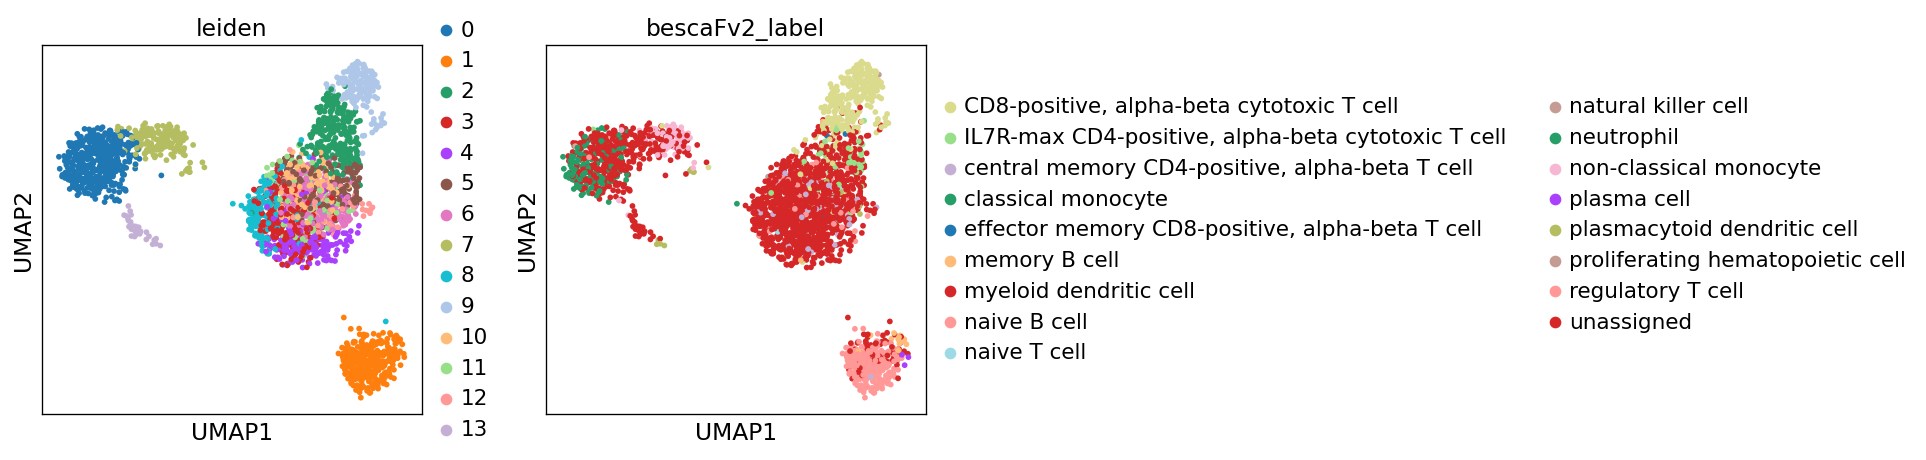

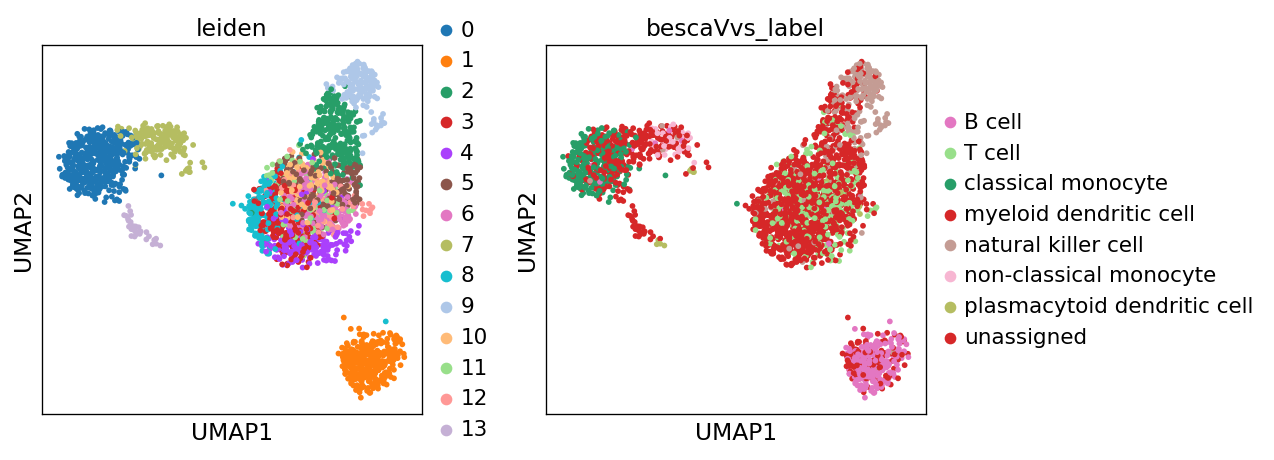

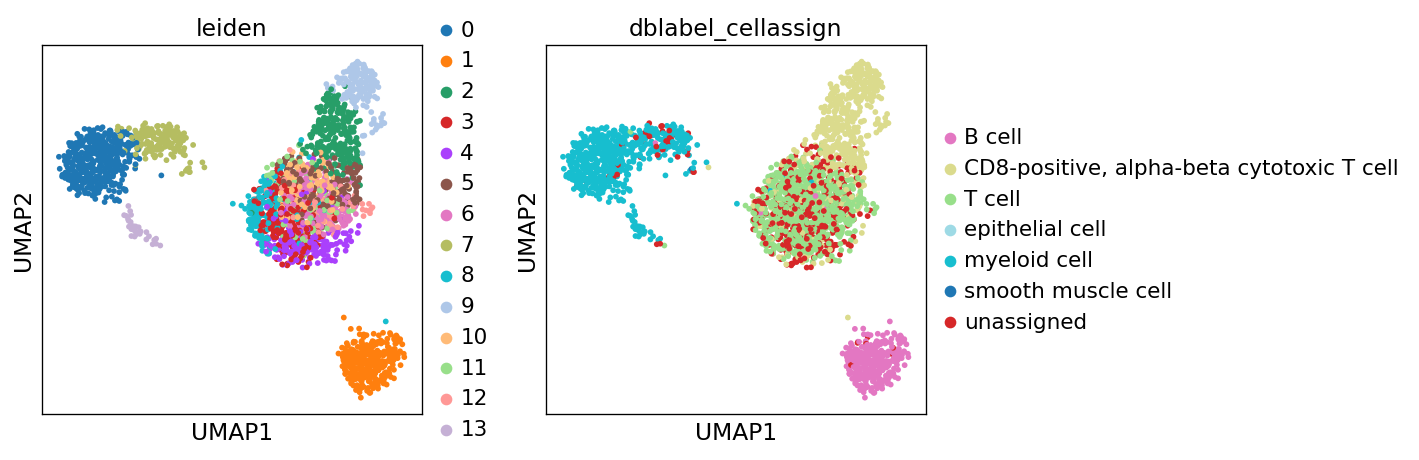

In [99]:
sc.pl.umap( pbmc3K_prediction, color = ["leiden",  'dblabel'], ncols= 2)
sc.pl.umap( pbmc3K_prediction, color = ["leiden",  'auto_annot'], ncols= 2)
sc.pl.umap( pbmc3K_prediction, color = ["leiden",  'bescaF_label'], ncols= 2)
sc.pl.umap( pbmc3K_prediction, color = ["leiden",  'bescaFv2_label'], ncols= 2)
sc.pl.umap( pbmc3K_prediction, color = ["leiden",  'bescaVvs_label'], ncols= 2)
sc.pl.umap( pbmc3K_prediction, color = ["leiden",  'dblabel_cellassign'], ncols= 2)



# Predictions reports generation 

In [100]:
#annot_comparison in adata_pred.obs_keys()

In [101]:
adata_pred = pbmc3K_prediction
method = "cellassign"
merge = False
remove_nonshared  = True
use_raw = True
genes_to_use = ""
clustering = "leiden"
asymmetric_matrix= True

## bescaF_label vs Sig-annot

Confusion matrix, without normalization
Normalized confusion matrix


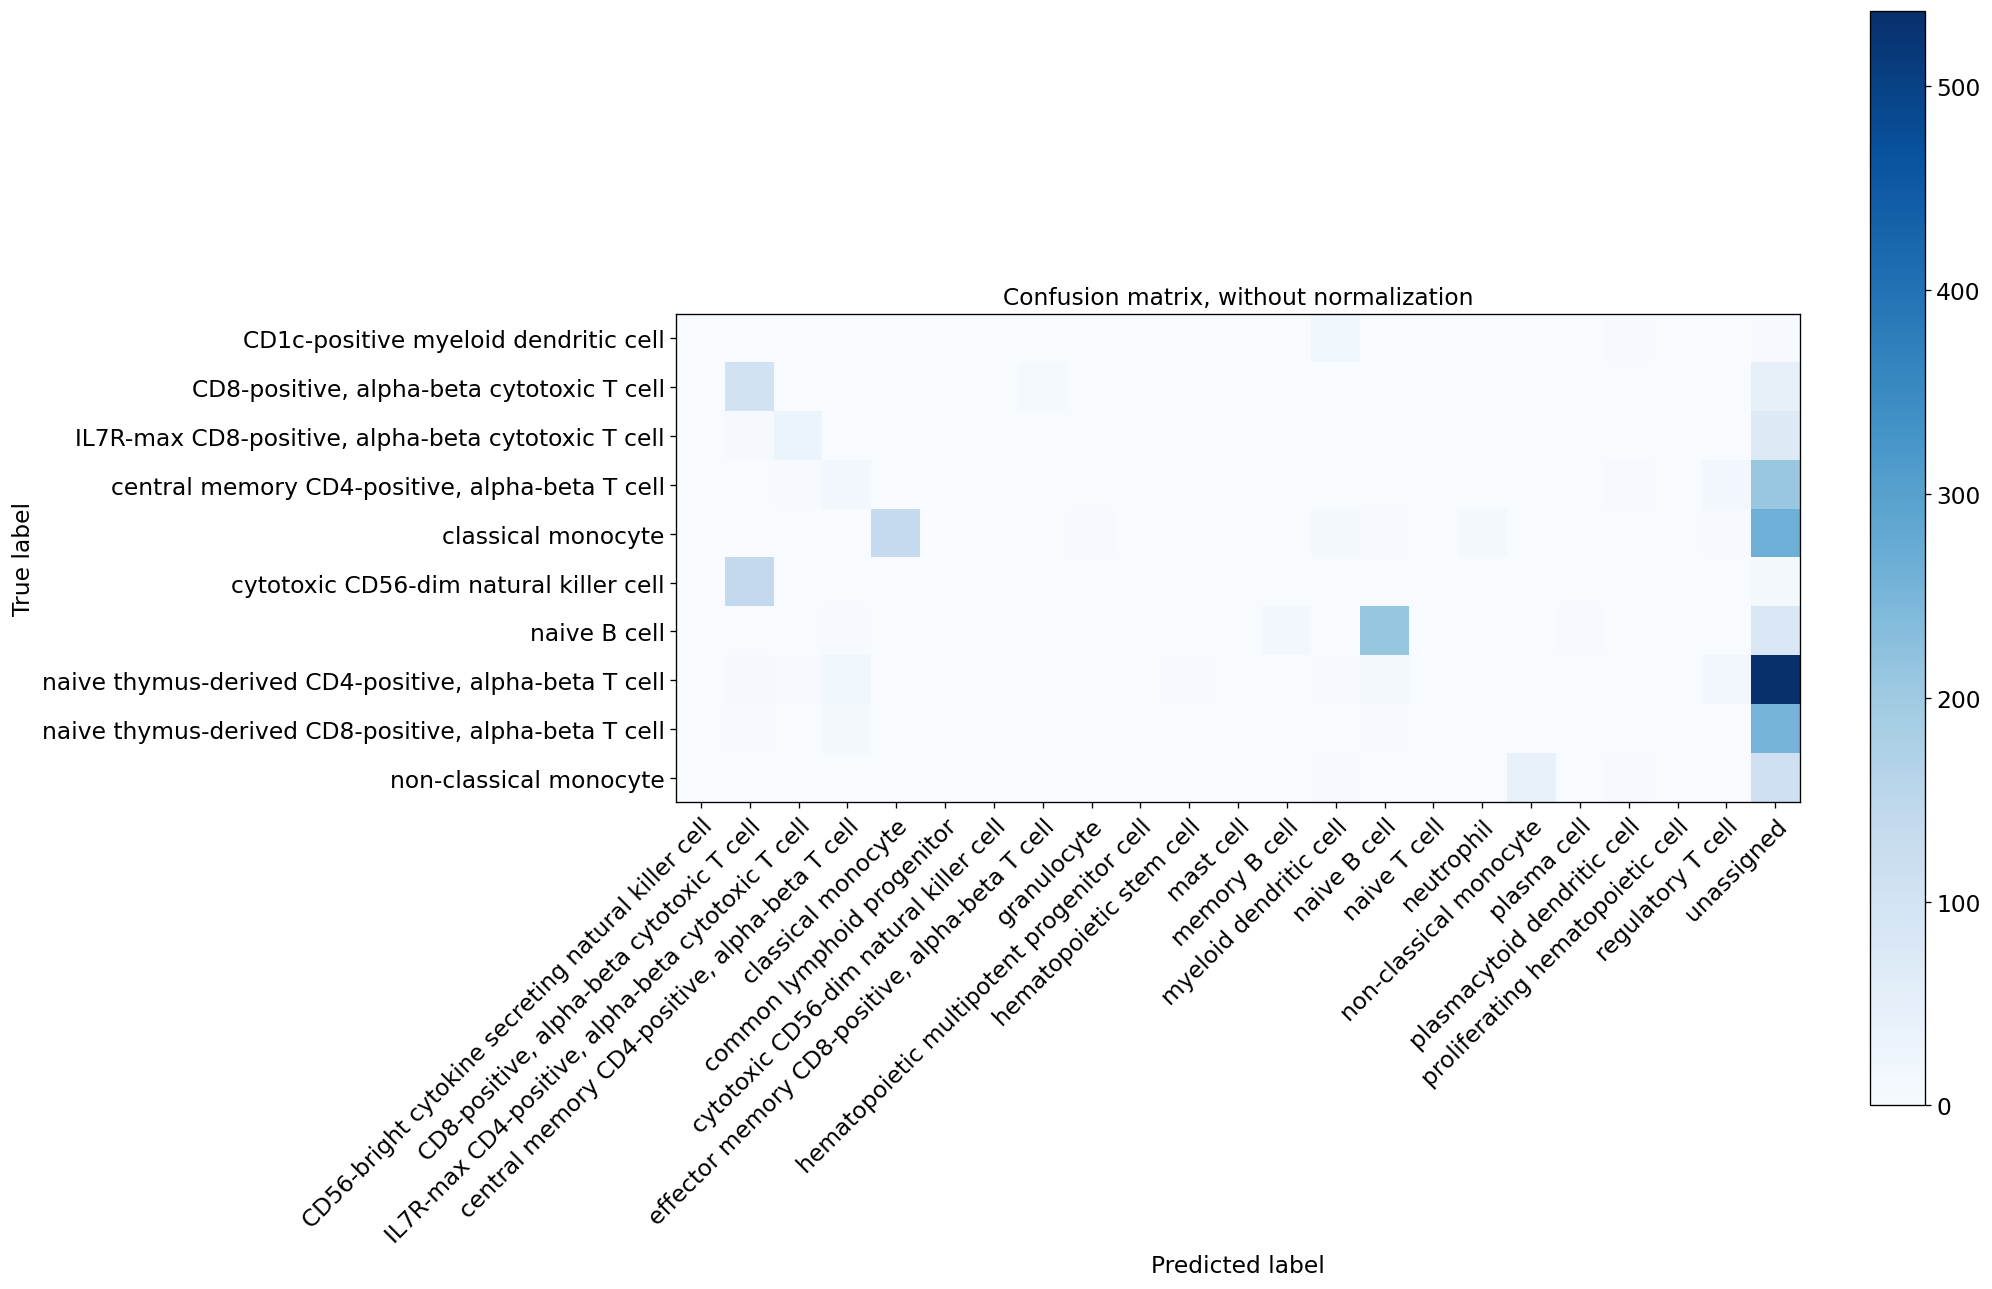

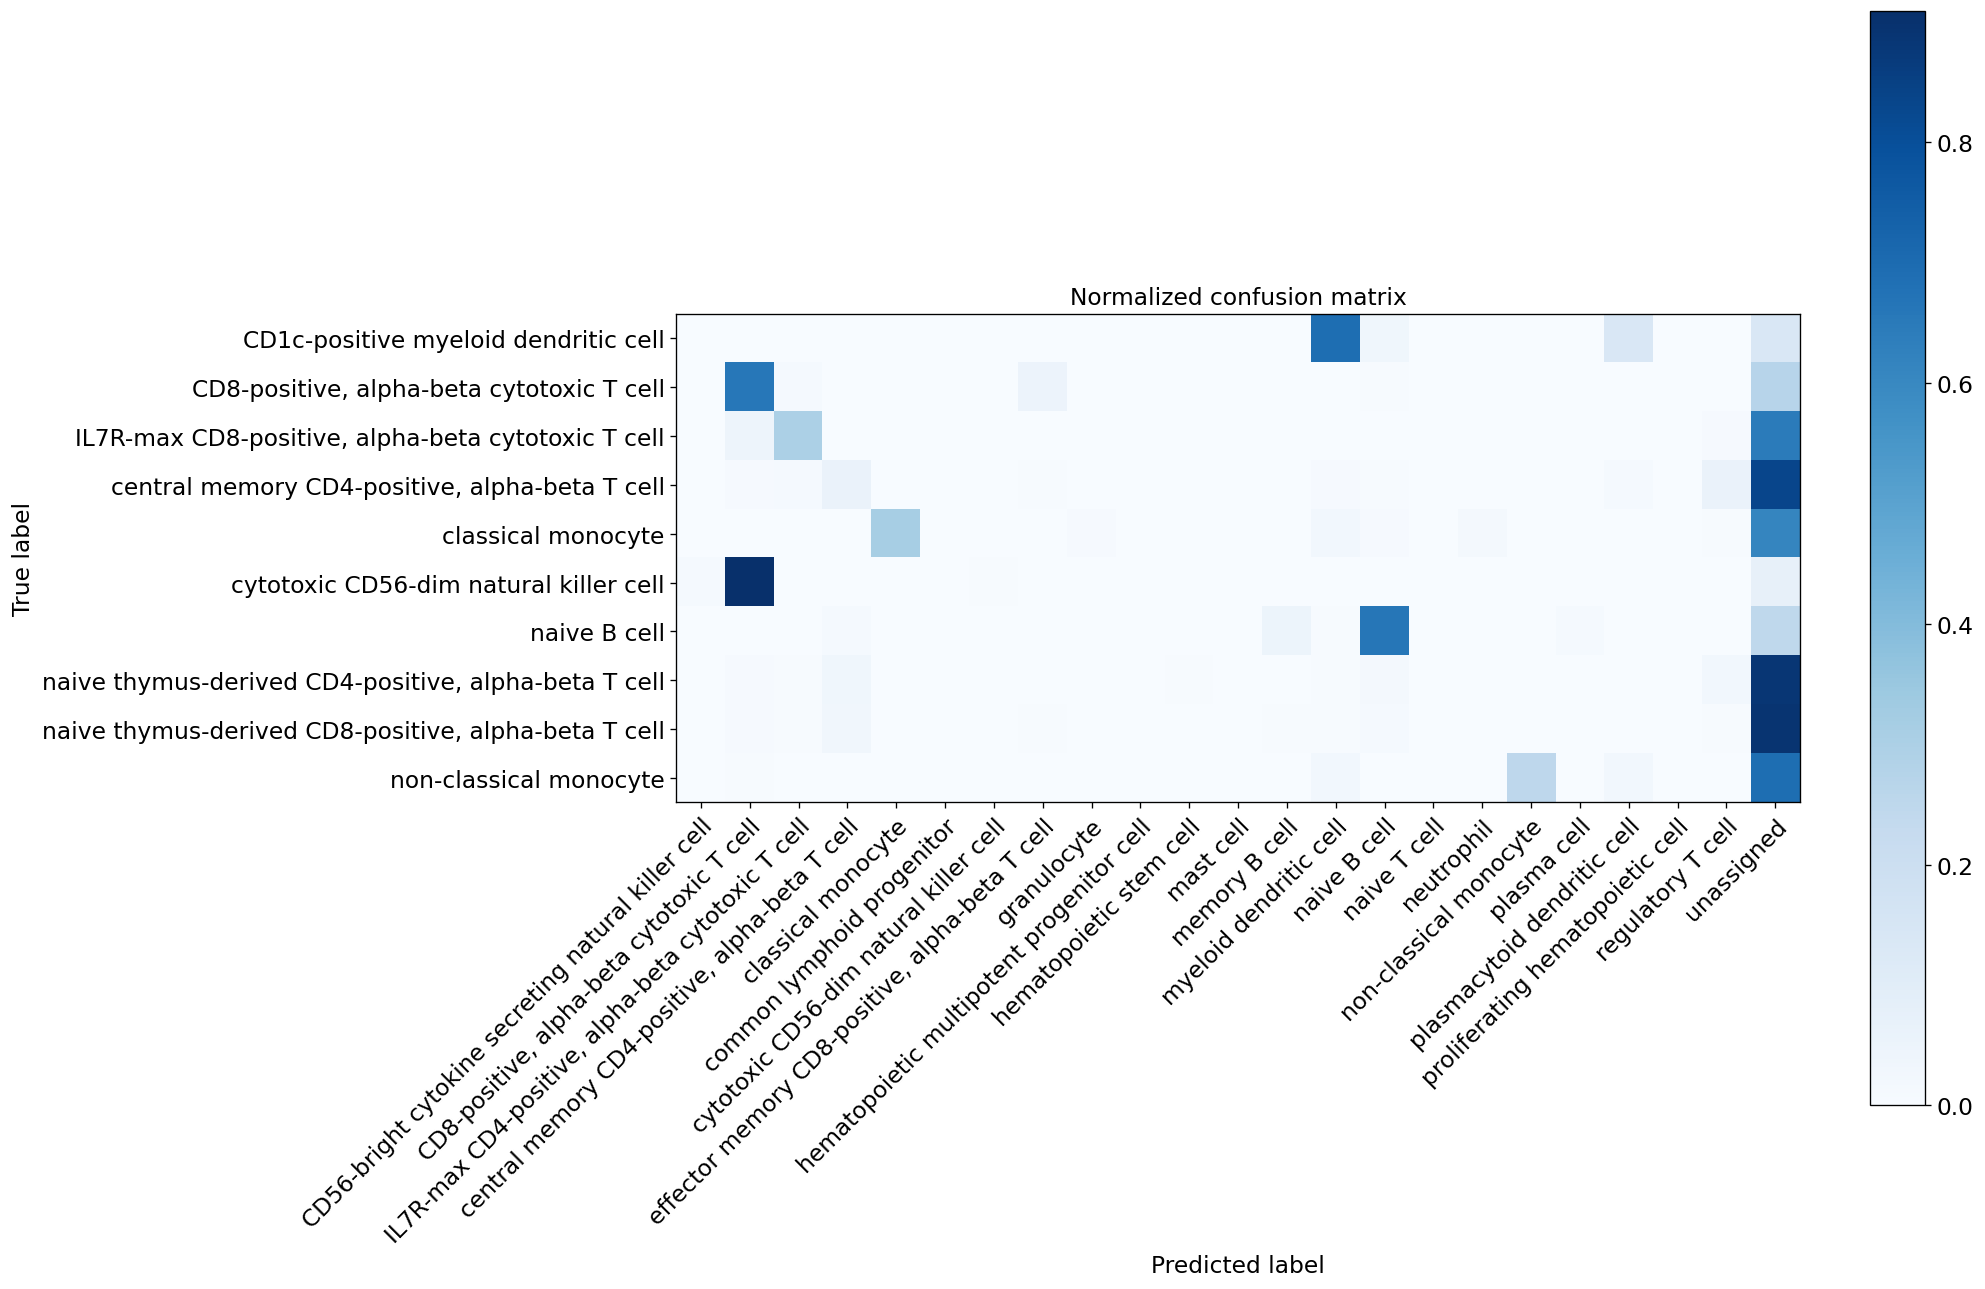

In [102]:

fig = bc.tl.report(adata_pred, 
                   celltype =  "dblabel", method = "cellassign", 
                   analysis_name =  "bescaF",
             train_datasets= "bescaF", test_dataset= "pbmc3k", name_report= "cellassign",
             merge = merge, name_prediction = 'bescaF_label', 
             use_raw = use_raw,  genes_to_use = genes_to_use,
             remove_nonshared = False, clustering =clustering, asymmetric_matrix = True)

#fig.show()

## bescaFv2_label vs Sig-annot

In [103]:
fig = bc.tl.report(adata_pred, 
                   celltype =  "dblabel", method = "cellassign", 
                   analysis_name =  "bescaFv2",
             train_datasets= "bescaFv2", test_dataset= "pbmc3k", name_report= "cellassign_Fv2",
             merge = merge, name_prediction = 'bescaFv2_label', 
             use_raw = use_raw,  genes_to_use = genes_to_use,
             remove_nonshared = False, clustering =clustering, asymmetric_matrix = True)

#fig.show()

Confusion matrix, without normalization
Normalized confusion matrix


## bescaVvs_label vs Sig-annot

Confusion matrix, without normalization
Normalized confusion matrix


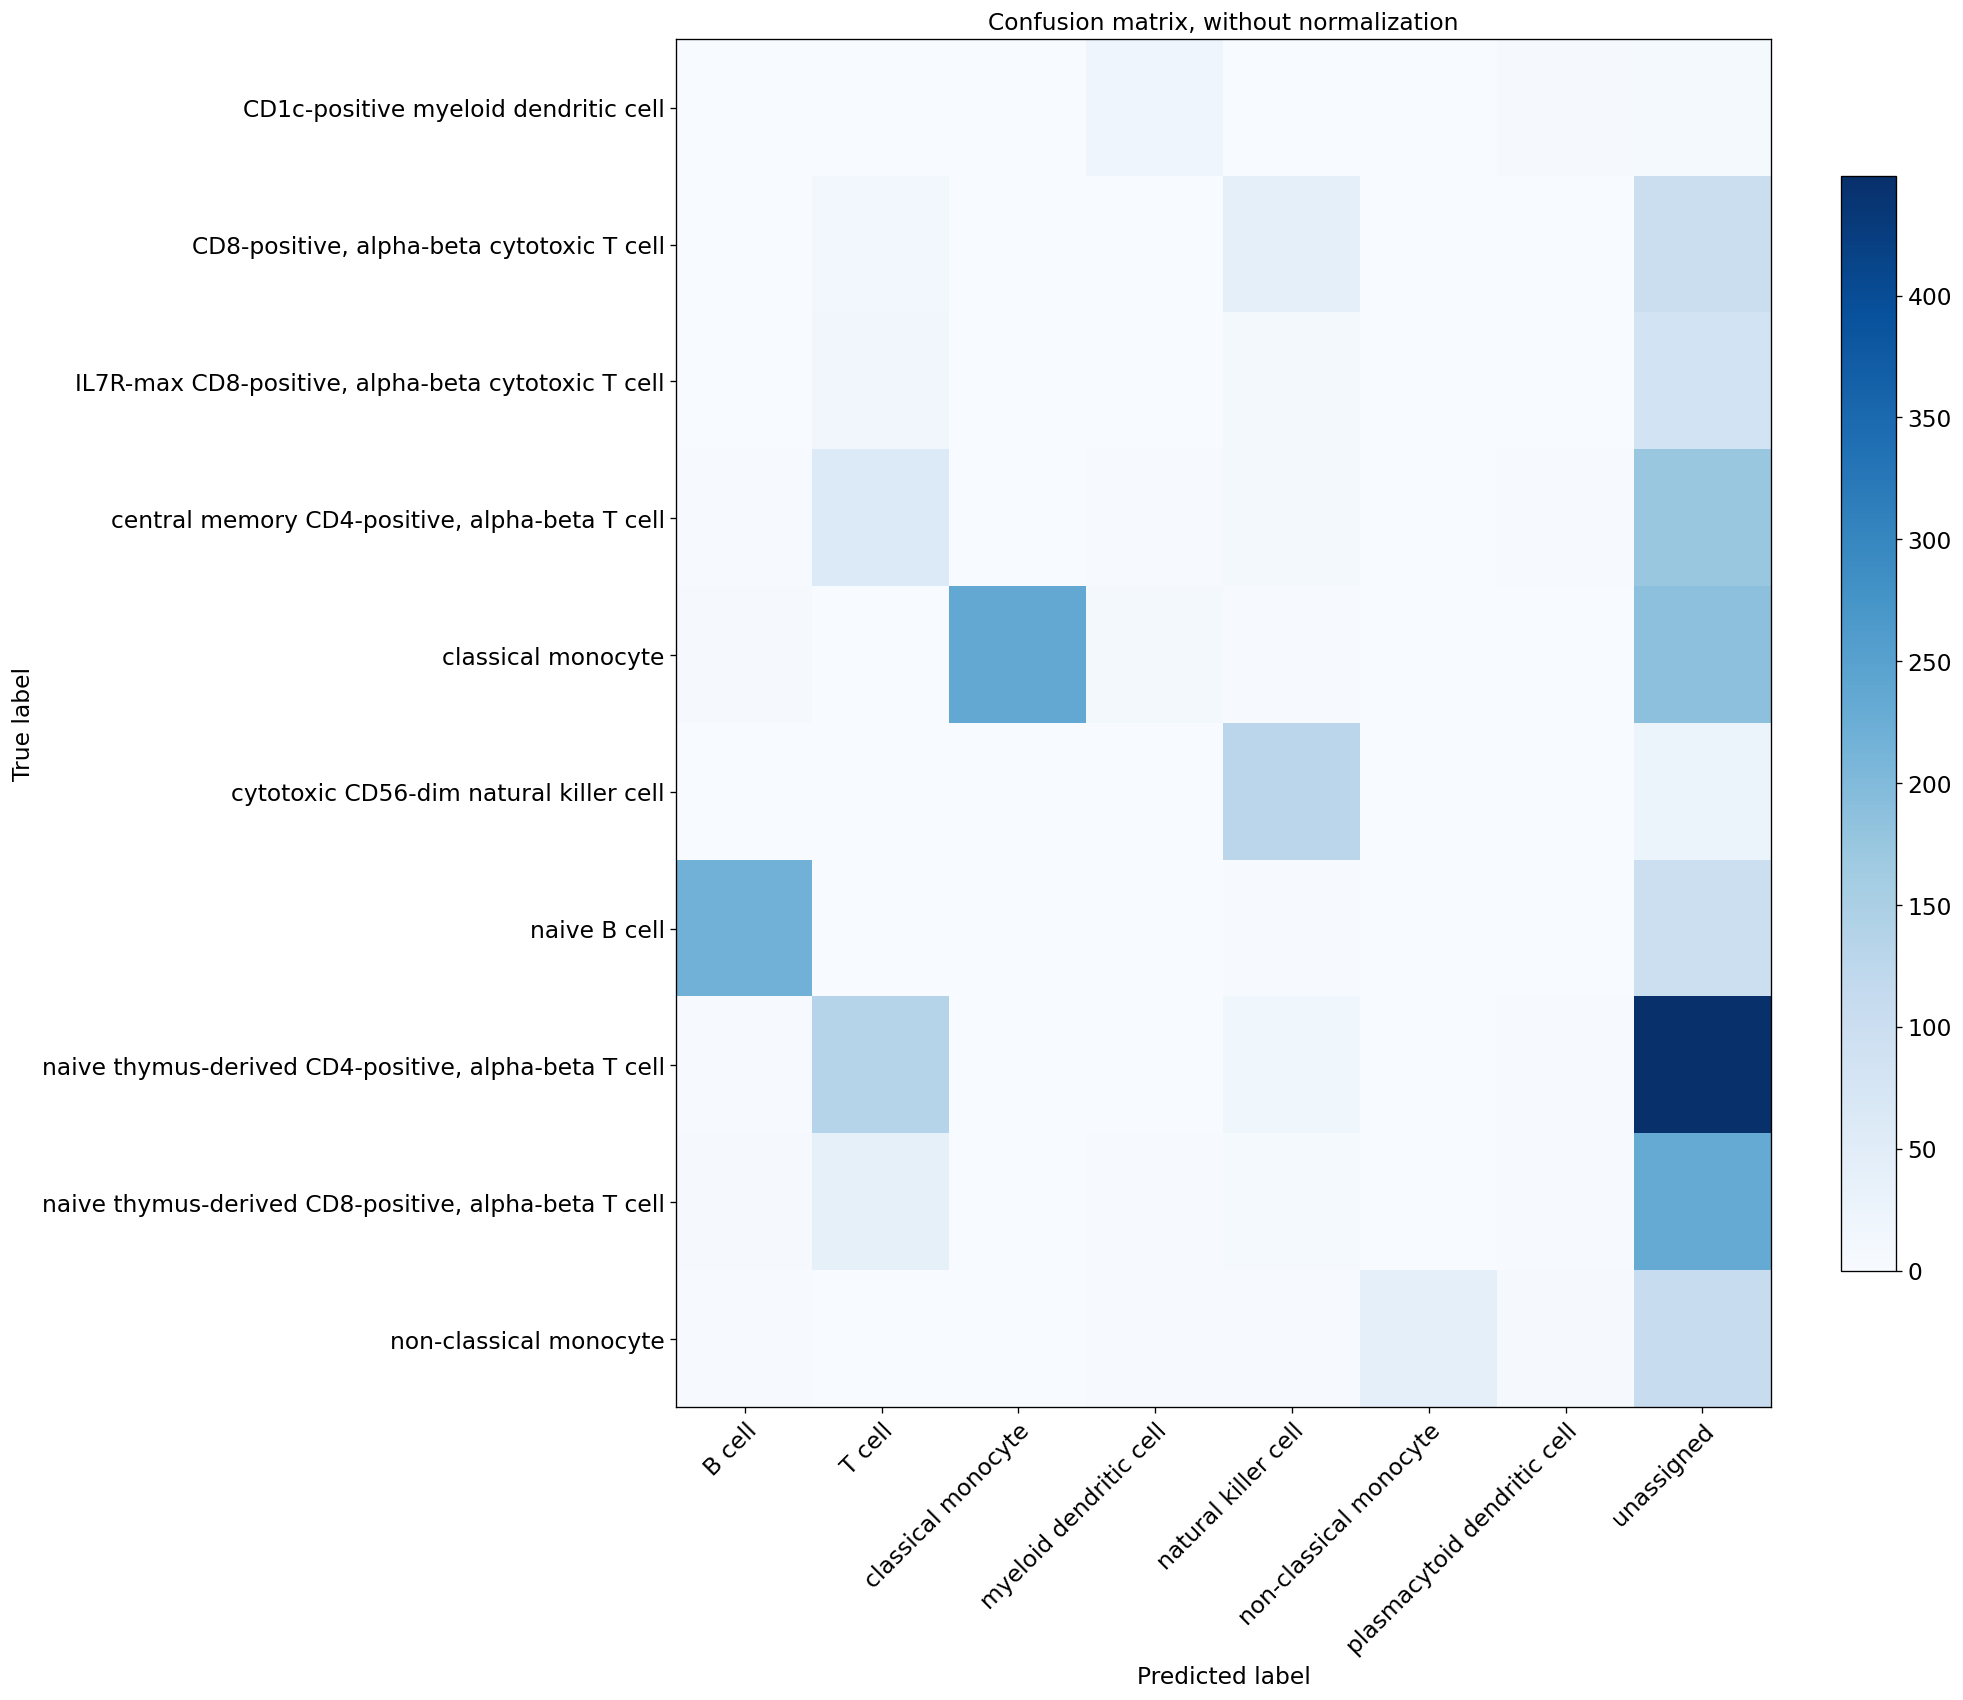

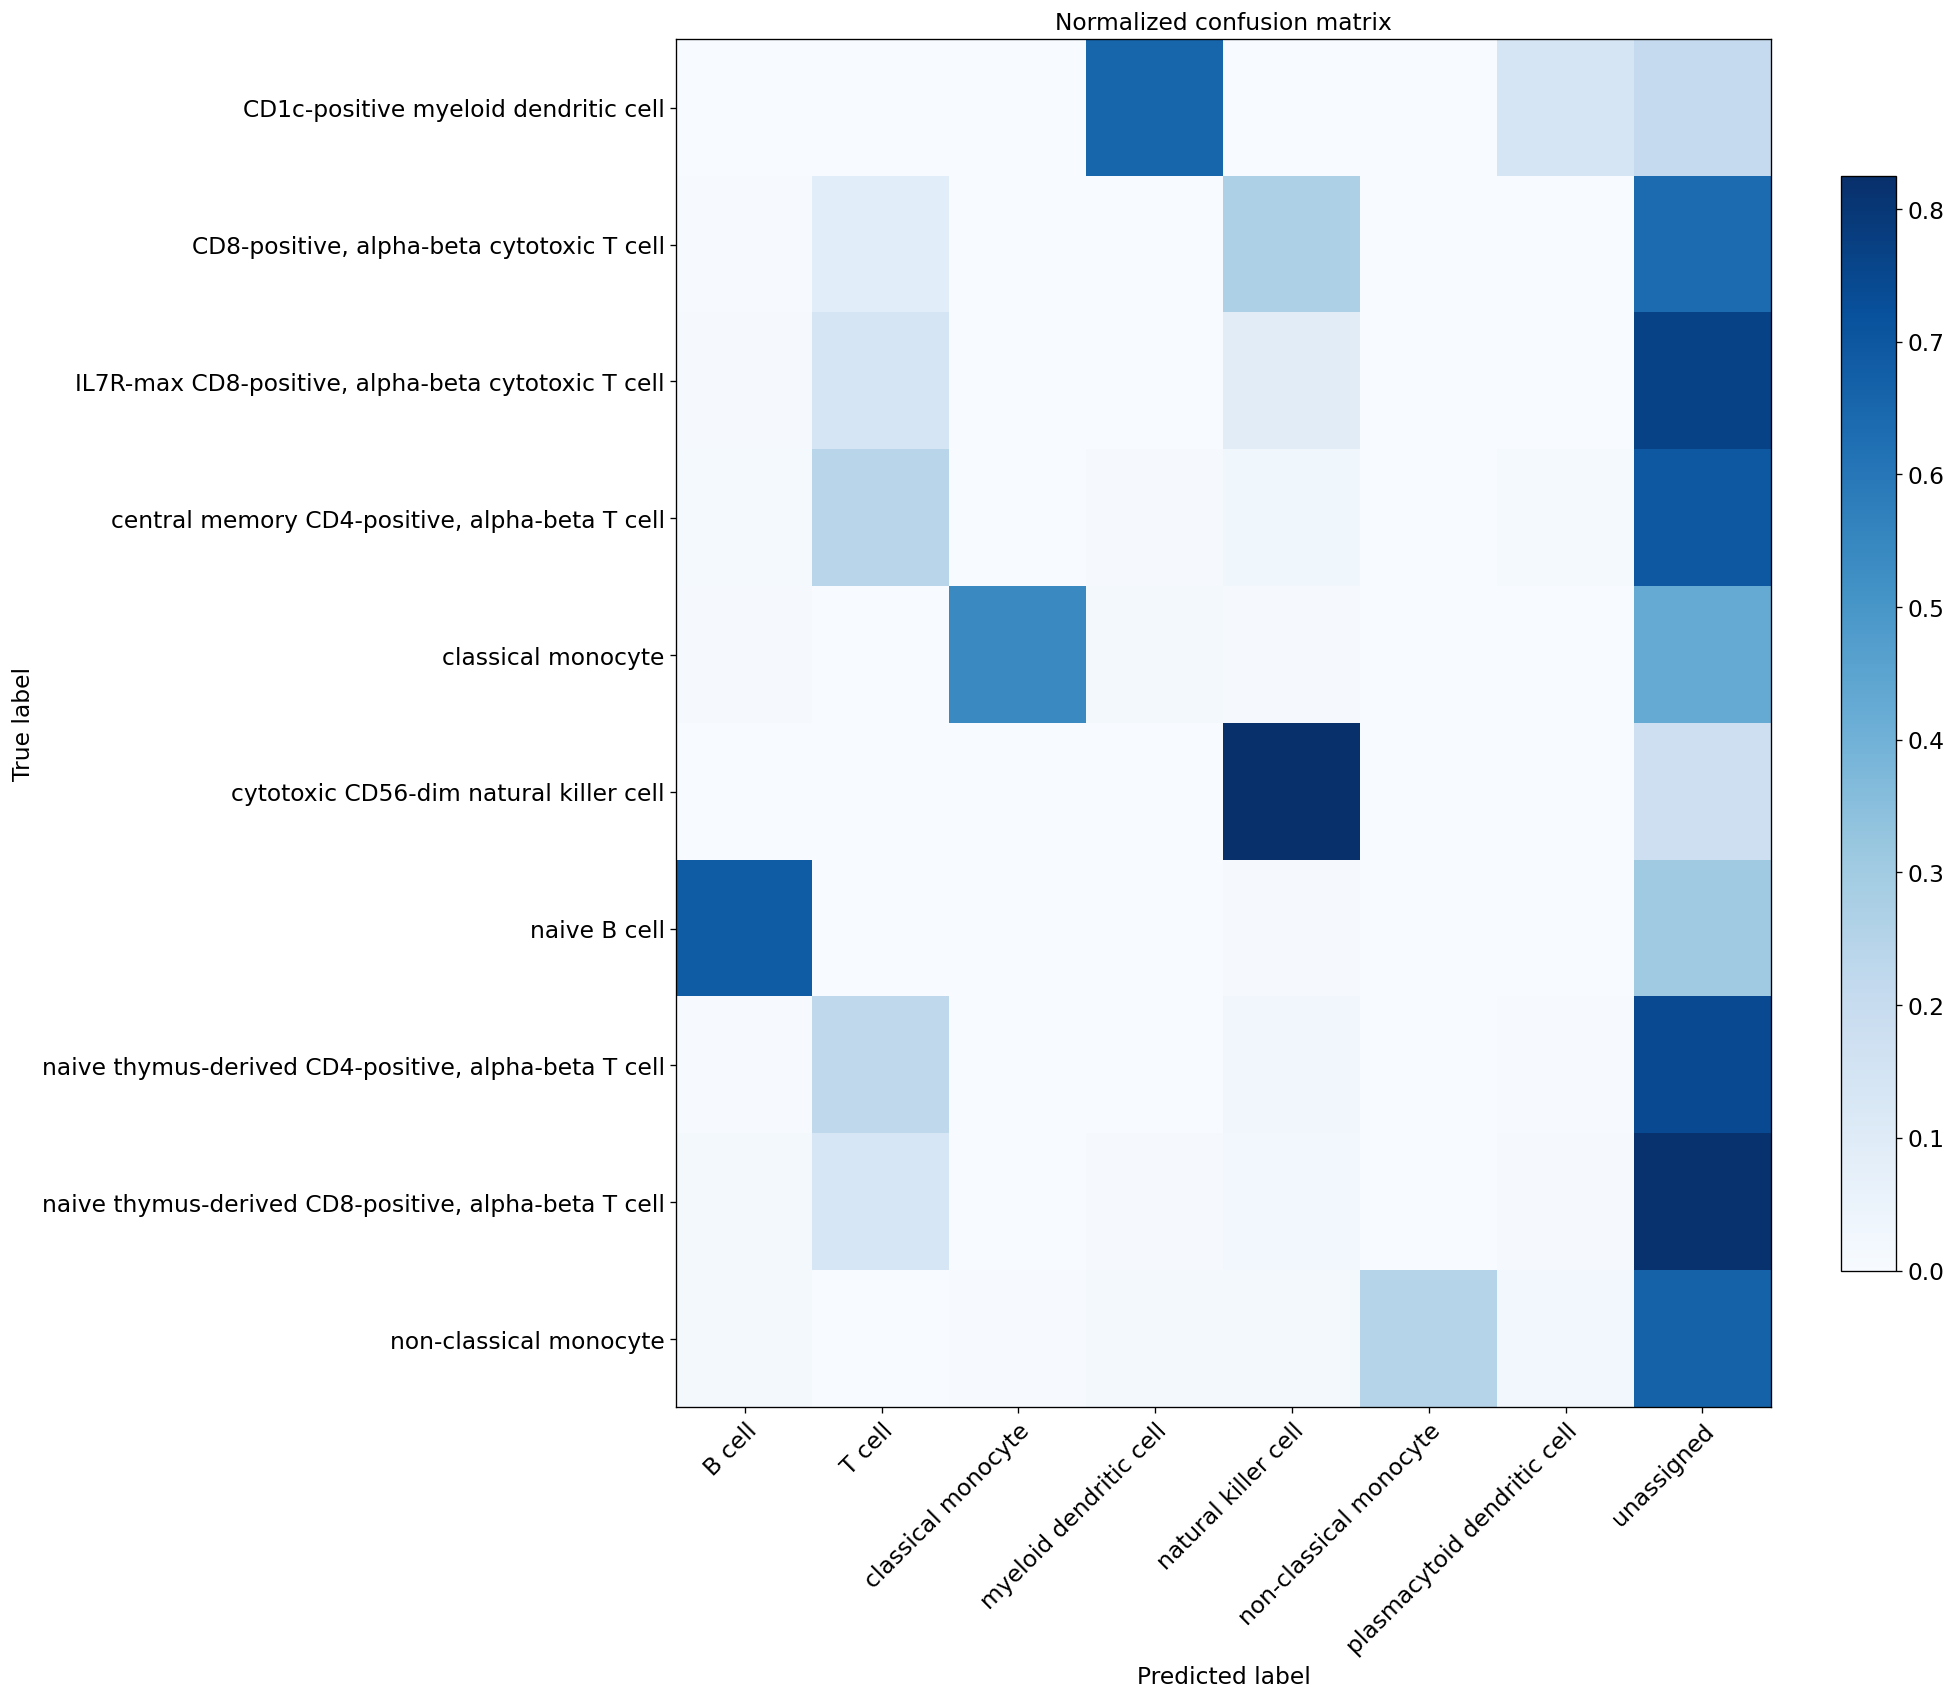

In [104]:
fig = bc.tl.report(adata_pred, 
                   celltype =  "dblabel", method = "cellassign", 
                   analysis_name =  "bescaVvs",
             train_datasets= "bescaVvs", test_dataset= "pbmc3k", name_report= "cellassign_Vvs",
             merge = merge, name_prediction = 'bescaVvs_label', 
             use_raw = use_raw,  genes_to_use = genes_to_use,
             remove_nonshared = False, clustering =clustering, asymmetric_matrix = True)


## cellassign_label vs Sig-annot

Confusion matrix, without normalization
Normalized confusion matrix


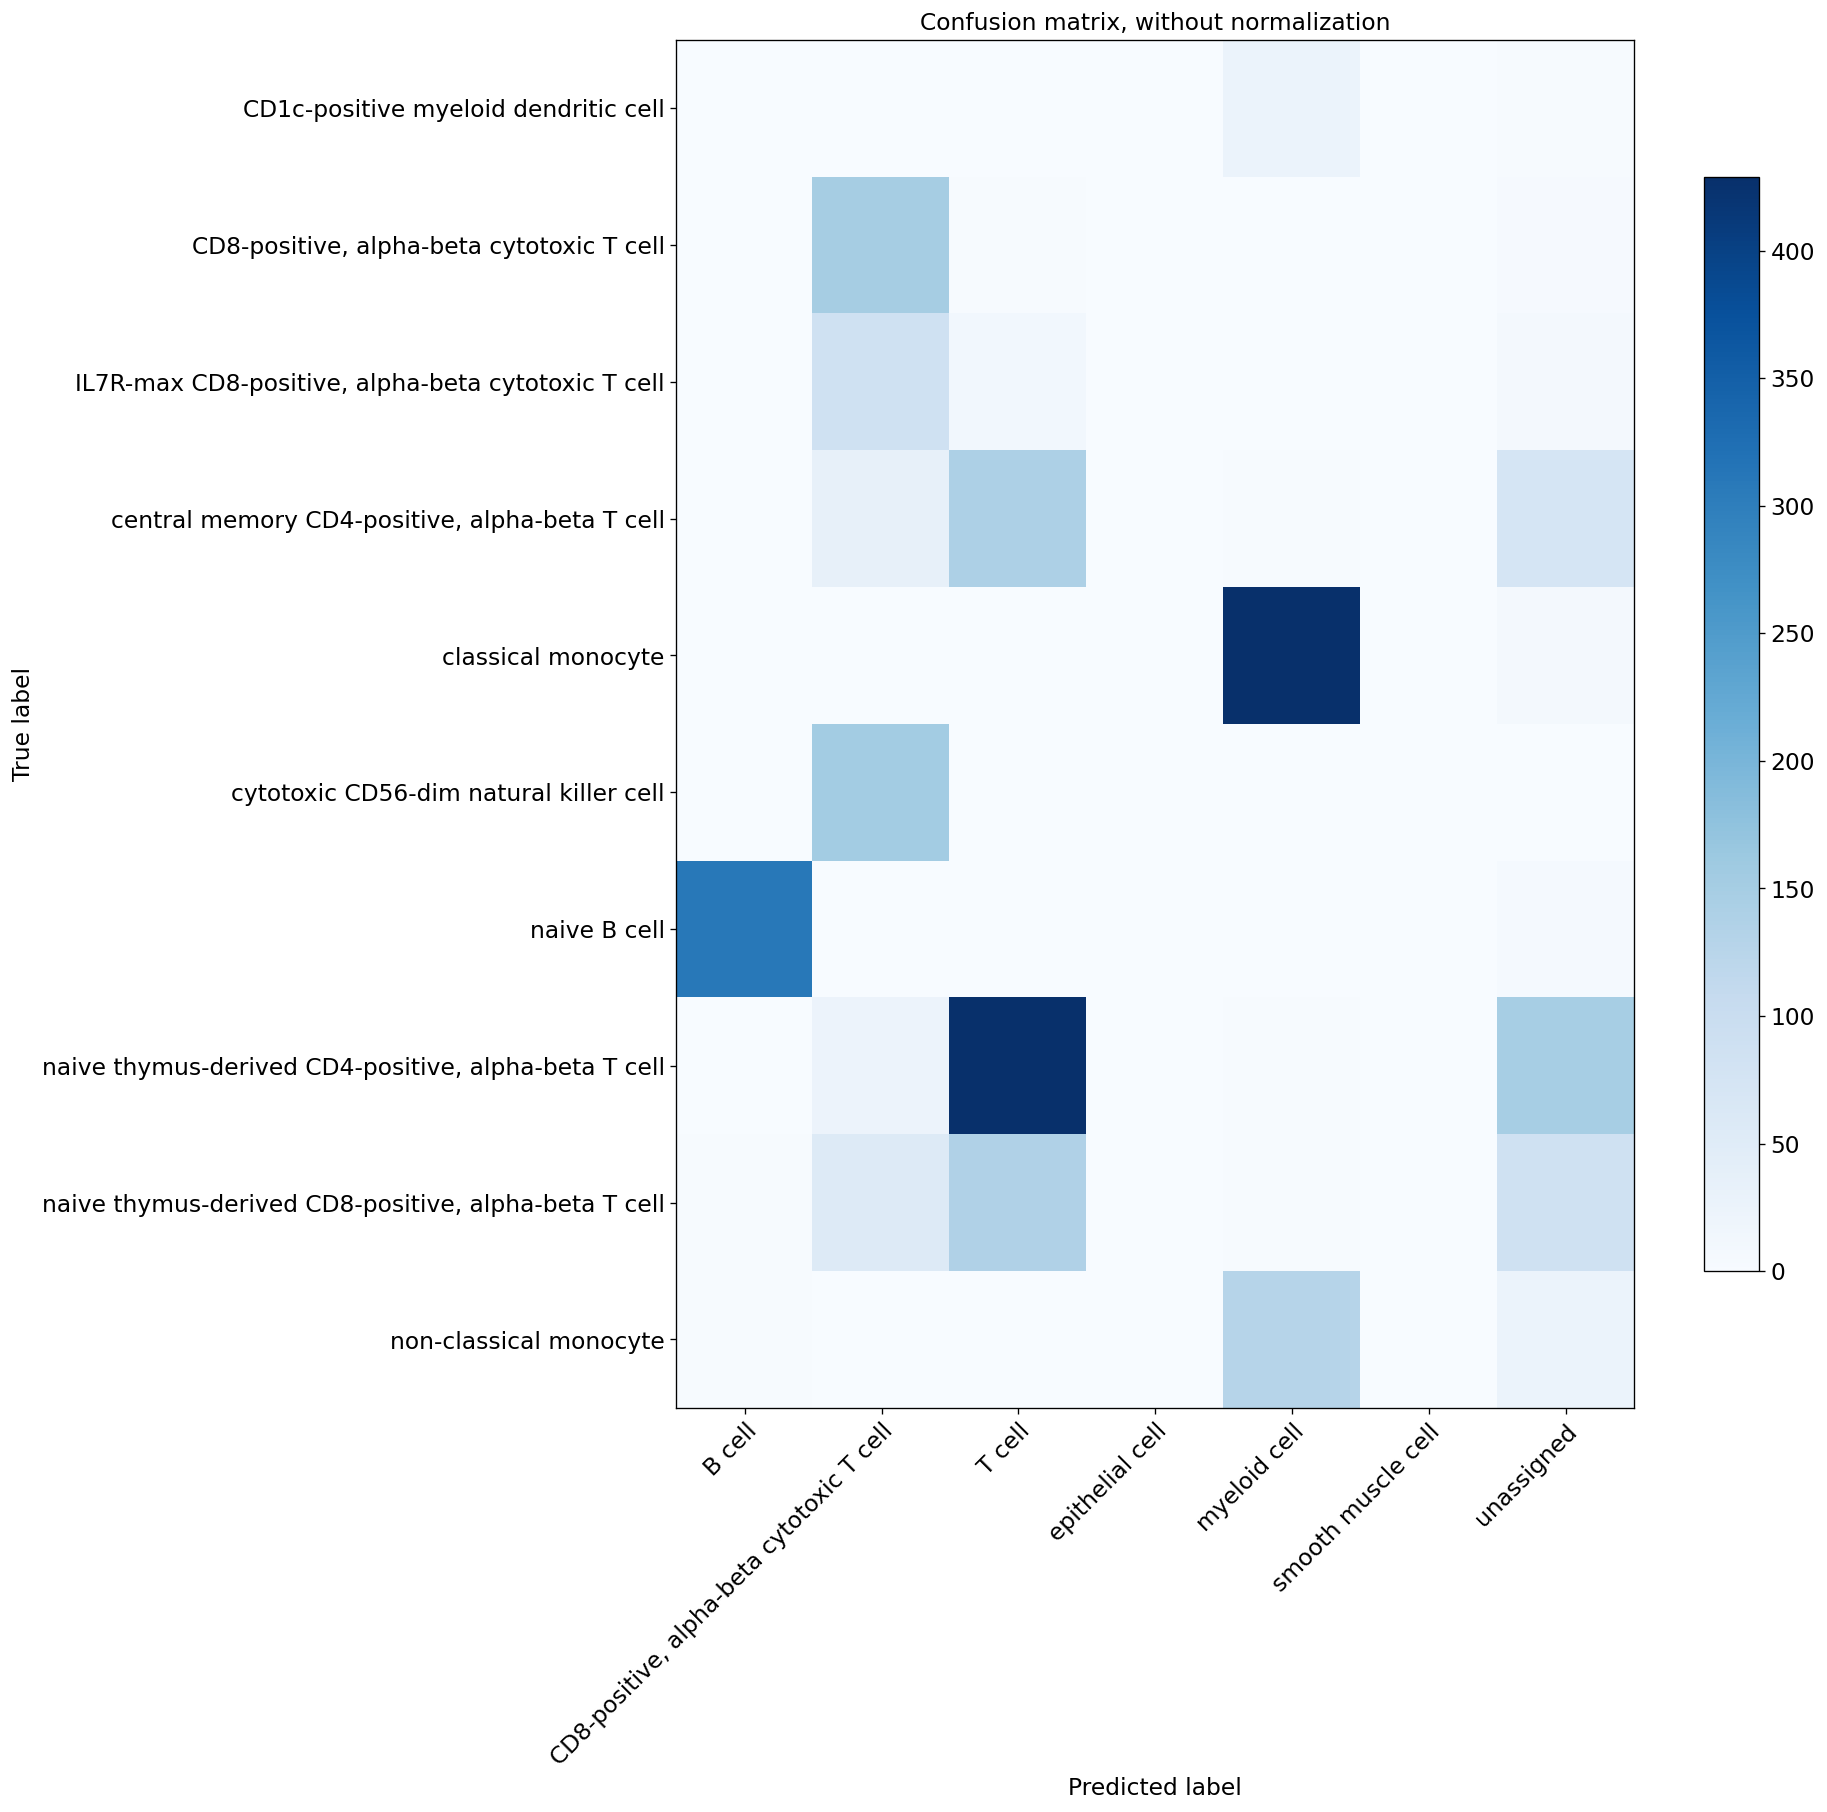

In [105]:

fig = bc.tl.report(adata_pred, 
                   celltype =  "dblabel", method = "cellassign", 
                   analysis_name =  "cellassign",
             train_datasets= "cellassign", test_dataset= "pbmc3k", name_report= "cellassign_example",
             merge = merge, name_prediction = 'dblabel_cellassign', 
             use_raw = use_raw,  genes_to_use = genes_to_use,
             remove_nonshared = False, clustering =clustering, asymmetric_matrix = True)



# Compare F1 Score 

Besca report generate overall models.
We retrieved the overall F1 and accuracy score for all reports generated in order to compare those values.



In [106]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(".") if isfile(join(".", f)) and '_report_' in f]


In [107]:
f1_values  = pd.DataFrame(columns=['accuracy', 'f1' ] , index=onlyfiles)

In [108]:
onlyfiles

['cellassign_Fv2_report_bescaFv2.csv',
 'cellassign_Vvs_report_bescaF.csv',
 'cellassign_Vvs_report_bescaVvs.csv',
 'cellassign_example_report_cellassign.csv',
 'cellassign_report_bescaF.csv']

In [109]:

for report in onlyfiles :
    get_info = open(report, "r").readlines()[3]
    dd = get_info.split(',')
    f1_values.loc[report] =[dd[1], dd[3].rstrip('\n')]
f1_values

accuracy  \
cellassign_Fv2_report_bescaFv2.csv        0.21845047923322683   
cellassign_Vvs_report_bescaF.csv          0.10982428115015974   
cellassign_Vvs_report_bescaVvs.csv        0.10982428115015974   
cellassign_example_report_cellassign.csv  0.05990415335463259   
cellassign_report_bescaF.csv              0.20247603833865815   

                                                           f1  
cellassign_Fv2_report_bescaFv2.csv         0.2619440008400595  
cellassign_Vvs_report_bescaF.csv           0.1471481025732684  
cellassign_Vvs_report_bescaVvs.csv         0.1471481025732684  
cellassign_example_report_cellassign.csv  0.02819018981394475  
cellassign_report_bescaF.csv               0.2480235059887537

A large number of cells remain unassigned. In particular T cell assignment seems problematic. 

# END

In [110]:
! jupyter nbconvert --to html Cellassign_comparison.ipynb

[NbConvertApp] Converting notebook Cellassign_comparison.ipynb to html
[NbConvertApp] Writing 5622644 bytes to Cellassign_comparison.html


In [111]:
from sinfo import sinfo
sinfo()

-----
anndata     0.7.5
besca       2.3+34.gf0f50cb
pandas      1.2.0
plotly      4.14.1
scanpy      1.6.0
seaborn     0.11.1
sinfo       0.3.1
-----
IPython             7.19.0
jupyter_client      6.1.7
jupyter_core        4.7.0
notebook            6.1.6
-----
Python 3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 12:57:14) [GCC 7.3.0]
Linux-3.10.0-693.11.6.el7.x86_64-x86_64-with-centos-7.4.1708-Core
24 logical CPU cores, x86_64
-----
Session information updated at 2021-01-06 17:33
